In [202]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [203]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [204]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Classification

In [205]:
def create_model_classification():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Huấn luyện mô hình với các cấu hình khác nhau

In [206]:
configs = [
    {'name': 'Default', 'model': create_model_classification()},
    {'name': 'Small', 'model': create_model_classification()},
    {'name': 'Large', 'model': create_model_classification()},
]
for config in configs:
    print(f"Training model: {config['name']}")
    model = config['model']
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=2)
    config['history'] = history

Training model: Default
Epoch 1/10
469/469 - 2s - loss: 0.3343 - accuracy: 0.9019 - val_loss: 0.1458 - val_accuracy: 0.9544 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1558 - accuracy: 0.9545 - val_loss: 0.1002 - val_accuracy: 0.9694 - 2s/epoch - 3ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1164 - accuracy: 0.9654 - val_loss: 0.0840 - val_accuracy: 0.9740 - 2s/epoch - 4ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0963 - accuracy: 0.9706 - val_loss: 0.0734 - val_accuracy: 0.9776 - 2s/epoch - 4ms/step
Epoch 5/10
469/469 - 2s - loss: 0.0792 - accuracy: 0.9756 - val_loss: 0.0695 - val_accuracy: 0.9784 - 2s/epoch - 4ms/step
Epoch 6/10
469/469 - 2s - loss: 0.0702 - accuracy: 0.9781 - val_loss: 0.0642 - val_accuracy: 0.9806 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0622 - val_accuracy: 0.9802 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0587 - accuracy: 0.9814 - val_loss: 0.0607 - val_accuracy: 0.9801 - 2s/epoch - 4ms/step


# Vẽ đồ thị khi train

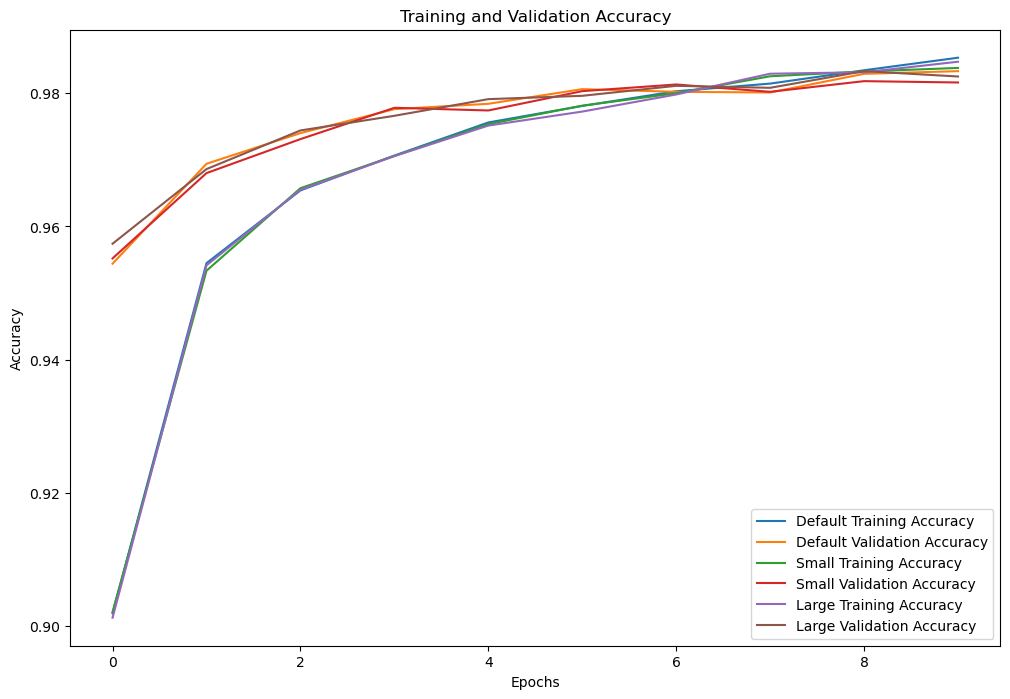

In [207]:
plt.figure(figsize=(12, 8))
for config in configs:
    plt.plot(config['history'].history['accuracy'], label=f"{config['name']} Training Accuracy")
    plt.plot(config['history'].history['val_accuracy'], label=f"{config['name']} Validation Accuracy")

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Regression

In [208]:
def create_model_regression():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Huấn luyện mô hình với các cấu hình khác nhau


In [209]:
configs = [
    {'name': 'Default', 'model': create_model_regression()},
    {'name': 'Small', 'model': create_model_regression()},
    {'name': 'Large', 'model': create_model_regression()},
]

for config in configs:
    print(f"Training model: {config['name']}")
    model = config['model']
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=2)
    config['history'] = history


Training model: Default
Epoch 1/10
469/469 - 2s - loss: 9.2885 - accuracy: 0.1816 - val_loss: 10.4397 - val_accuracy: 0.1798 - 2s/epoch - 5ms/step
Epoch 2/10
469/469 - 2s - loss: 9.1409 - accuracy: 0.1965 - val_loss: 9.1348 - val_accuracy: 0.1729 - 2s/epoch - 4ms/step
Epoch 3/10
469/469 - 2s - loss: 8.6094 - accuracy: 0.1873 - val_loss: 9.3735 - val_accuracy: 0.1200 - 2s/epoch - 4ms/step
Epoch 4/10
469/469 - 2s - loss: 8.7635 - accuracy: 0.1489 - val_loss: 9.8353 - val_accuracy: 0.1028 - 2s/epoch - 4ms/step
Epoch 5/10
469/469 - 2s - loss: 8.5990 - accuracy: 0.1044 - val_loss: 9.1051 - val_accuracy: 0.1028 - 2s/epoch - 4ms/step
Epoch 6/10
469/469 - 2s - loss: 8.6012 - accuracy: 0.1045 - val_loss: 9.2679 - val_accuracy: 0.1028 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 2s - loss: 8.6914 - accuracy: 0.1044 - val_loss: 8.9230 - val_accuracy: 0.1028 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 8.7245 - accuracy: 0.1045 - val_loss: 9.8208 - val_accuracy: 0.1028 - 2s/epoch - 4ms/step

# Vẽ đồ thị khi train

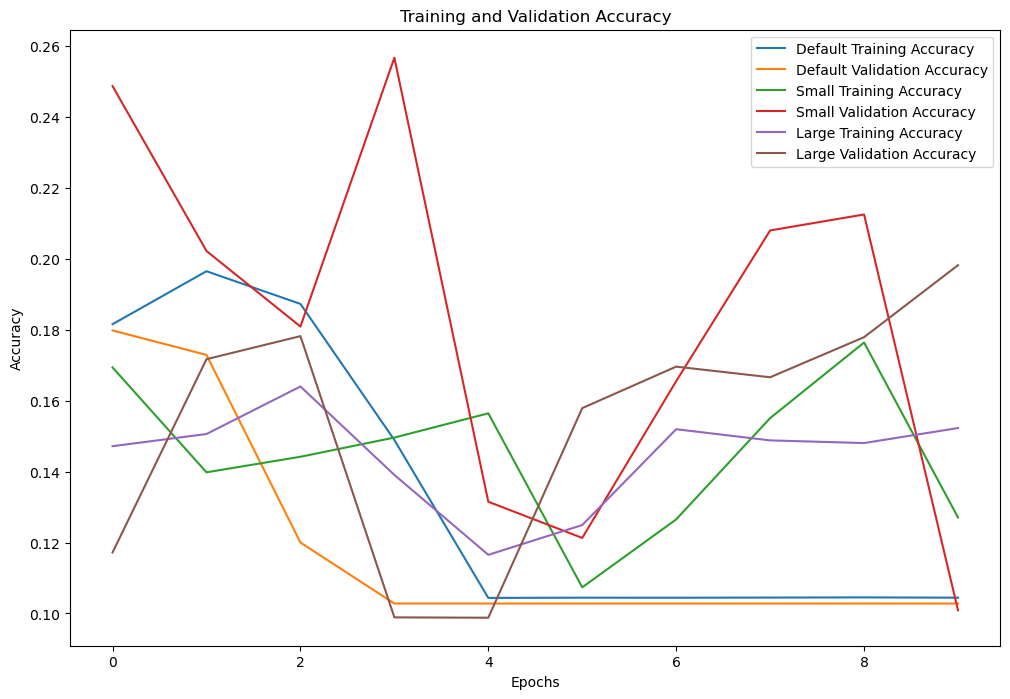

In [210]:
plt.figure(figsize=(12, 8))
for config in configs:
    plt.plot(config['history'].history['accuracy'], label=f"{config['name']} Training Accuracy")
    plt.plot(config['history'].history['val_accuracy'], label=f"{config['name']} Validation Accuracy")

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()